<a href="https://colab.research.google.com/github/adalbertii/Seci-konwolucyjne/blob/main/convolutional-with_ann-layer-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def convert_image(file):
   return np.array(Image.open(file).convert('L'))
# 'L' - transformacja do obrazu greyscale

In [ ]:
image_01 = convert_image(r'/content/drive/MyDrive/dane/tymek 02.jpg')
image_01.shape

(3000, 4000)

In [ ]:
image_01.shape[0]


3000

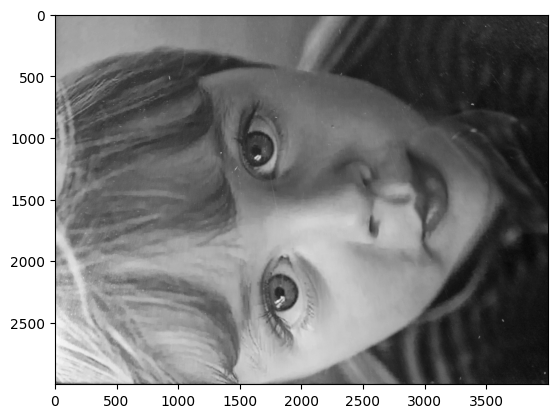

In [ ]:
plt.imshow(image_01, cmap='gray',)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

In [ ]:
#model = Sequential(Conv2D(filters=1, kernel_size=(3,3), input_shape=(3000, 4000, 1)))
model = Sequential(Conv2D(filters=1, kernel_size=(3,3), input_shape=(image_01.shape[0], image_01.shape[1], 1)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 2998, 3998, 1)     10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# wagi wylosowane w ramach budowy modelu
print(model.get_weights())

[array([[[[ 0.23399699]],

        [[ 0.0591411 ]],

        [[-0.45403284]]],


       [[[ 0.06748176]],

        [[ 0.5772011 ]],

        [[-0.46907383]]],


       [[[ 0.3121314 ]],

        [[ 0.33761173]],

        [[-0.21361223]]]], dtype=float32), array([0.], dtype=float32)]


In [ ]:
# przygotowanie zdjęcia do Predykcji
image4Conv = tf.expand_dims(image_01, 0) # Zwraca tensor z osią o długości 1 wstawioną na osi indeksu.
image4Conv.shape

TensorShape([1, 3000, 4000])

In [ ]:
image4Conv = tf.expand_dims(image4Conv, -1)
image4Conv.shape

TensorShape([1, 3000, 4000, 1])

In [ ]:
# PREDYKCJA
result = model.predict(image4Conv)
result.shape

1/1 [==============================] - 1s 853ms/step


(1, 2998, 3998, 1)

In [ ]:
# przygotowanie wyniku do wyświetlenia wyniku "predykcji"
result = tf.squeeze(result) # ta operacja zwraca tensor tego samego typu z usuniętymi wszystkimi wymiarami o rozmiarze 1
result.shape

TensorShape([2998, 3998])

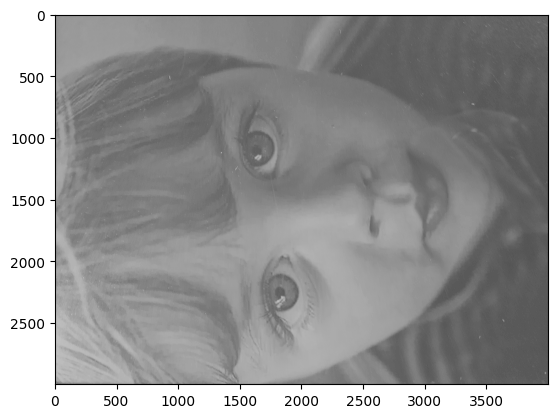

In [ ]:
plt.imshow(result, cmap='gray')

**Warstwa neuronowa zasilana manualnym filtrem**

In [ ]:
from tensorflow.keras import backend as K

# definicja manualna filtrów
def my_filter(shape, dtype=None):
   # Ustawiamy filtr
   f = np.array([
         [[[-2]], [[-1]], [[-1]]],
         [[[-5]], [[ 1]], [[-8]]],
         [[[-9]], [[-1]], [[-1]]]
   ])
   return K.variable(f, dtype='float32')

In [ ]:
model_edge = Sequential(
   Conv2D(filters=1,
          kernel_size=(3,3),
          kernel_initializer=my_filter,
          input_shape=(3000, 4000, 1))
)

In [ ]:
image4Conv = tf.expand_dims(image_01, 0)
image4Conv = tf.expand_dims(image4Conv, -1)
image4Conv.shape

TensorShape([1, 3000, 4000, 1])

In [ ]:
result_edge = model_edge.predict(image4Conv)
result_edge.shape

1/1 [==============================] - 1s 1s/step


(1, 2998, 3998, 1)

In [ ]:
result_edge = tf.squeeze(result_edge)
result_edge.shape

TensorShape([2998, 3998])

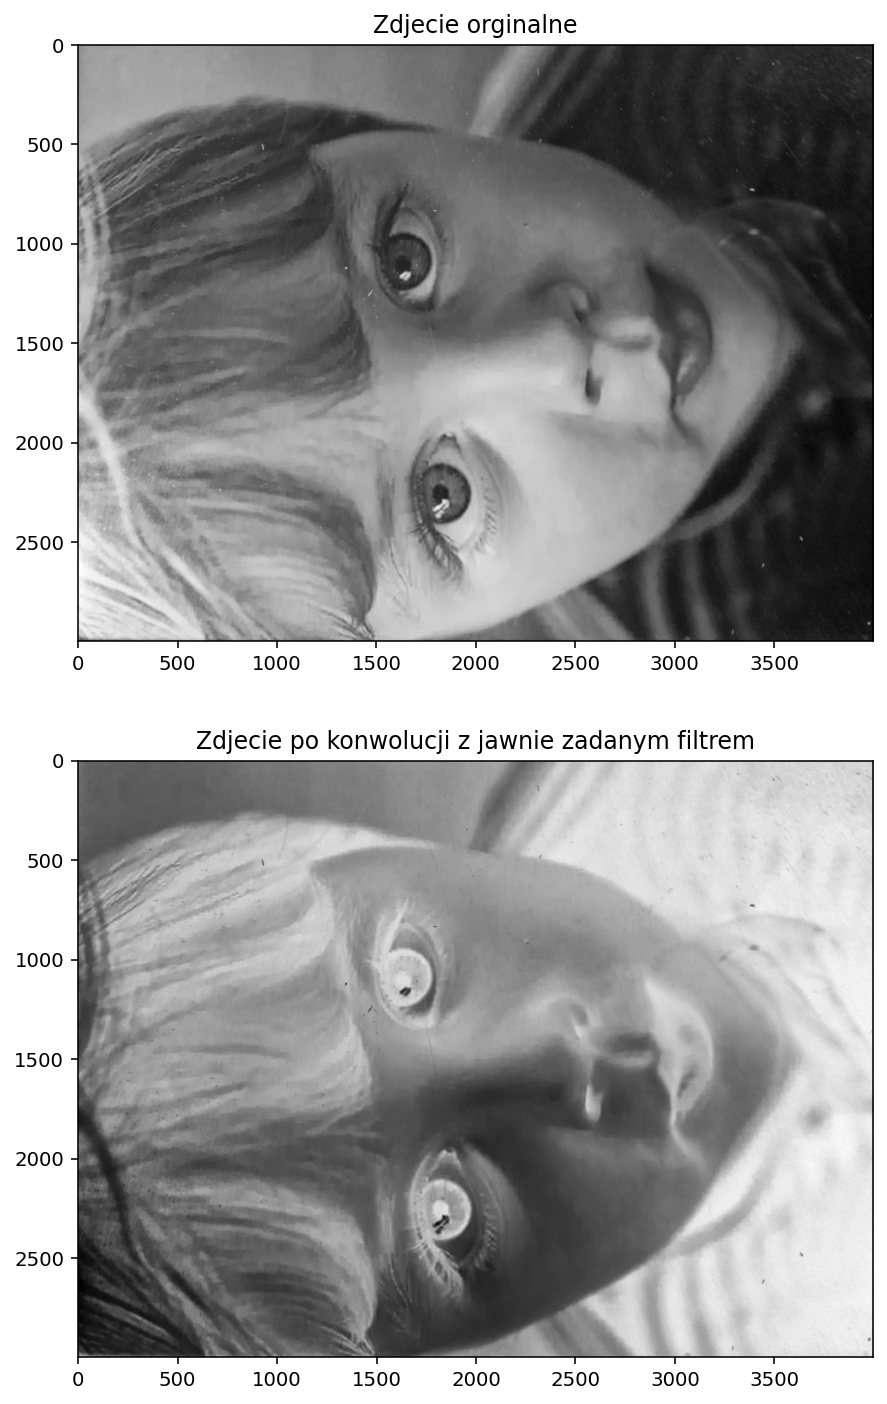

In [ ]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 142
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(image_01, cmap='gray')
ax1.set_title('Zdjecie orginalne')
ax2 = fig.add_subplot(2,1,2)
ax2.imshow(result_edge, cmap='gray')
ax2.set_title('Zdjecie po konwolucji z jawnie zadanym filtrem')
plt.show()